# Final Project 2: Exploratory Data Analysis on University Rankings

This case study consists of 3 parts: 


A. Data understanding and exploration
- Student to decide how to explore, inspect and cleanse the data 

B. Questions: 6 in total
- Answer the questions and derive the requested outputs with necessary explanations and inferences 

C. Open-ended Question 
- Student to decide the scope and methods/packages to use to answer the question and derive insights

The data reflects four years of ranking, 2012, 2013, 2014, 2015; 2012 and 2013 consists of the top 100 universities while 2014, and 2015 are the top 1000 universities. The data could be assessed on a yearly basis to uncover trends. 

The data was collected by The Center for World University Rankings. Sampling was weighted based on the following criteria: research output, (10%), high-quality publication, (10%), influence, (10%), citations, (10%), quality of faculty, (10%), alumni employment, (25%), quality of education, (25%). The totals of the above criteria is then used te create an aggregation and scoring. 

Data dictionary:
- World_rank - World rank for the university.
- Institution - Name of the university.
- Country - Country of each university.
- National_Rank - Rank of university within its country.
- Quality_of_education - Rank for quality of education; measured by the number of a university's alumni who have garnered major international accolades, i.e. Pulitzer, Nobel Prize.
- Alumni_employment - Rank for alumni employment; measured by the number of a university's alumni who have held CEO positions at multinational companies in relation to the university's size.
- Quality_of_faculty - Rank for quality of faculty; measured by the number of faculty who have won major international awards.
- Publications - Rank for publications.
- Influence - Rank for influence.
- Citations - Rank for citations.
- Broad_impact - Rank for broad impact (only available for 2014 and 2015).
- Patents - Rank for patents.
- Score - Total score, used for determining world rank.
- Year - Years of ranking (2012 to 2015).

# A. Data Understanding and exploration

### Read the cwur.Data.csv file and inspect the data, understand the data (what are the components, how it looks like, and some basic statistics about the variables). Take necessary steps to address any problems or issues with the data and fix them with appropriate measures.

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
import plotly.graph_objs as go
import numpy as np
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("cwurData.csv")
df.info() 
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN) #no broad impact data for year 2012 and 2013
print(len(df)) # correct no of rows
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF) # no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB
     world_r

In [3]:
df.describe()#replace NA in broad_impact with mean of the broad impact of the institution in year 14,15.

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [4]:
mean = df.groupby('institution')['broad_impact'].transform('mean')
df['broad_impact'].fillna(mean, inplace= True)

is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN) #one row with NA as it was not found in 2014/2015 list. 


    world_rank       institution country  national_rank  quality_of_education  \
94          95  Williams College     USA             57                    18   

    alumni_employment  quality_of_faculty  publications  influence  citations  \
94                 15                 101           101        101        101   

    broad_impact  patents  score  year  
94           NaN      101  43.89  2012  


In [5]:
for i in range(2):
    institutes = df.loc[df.year==2014+i].institution
    for j in range(2):
        mask = df.loc[df.year==2012+j].institution.isin(institutes)
        print(df.loc[(df.year == 2012+j)].loc[~mask]) # verify that indeed williams college only found in 2012

    world_rank       institution country  national_rank  quality_of_education  \
94          95  Williams College     USA             57                    18   

    alumni_employment  quality_of_faculty  publications  influence  citations  \
94                 15                 101           101        101        101   

    broad_impact  patents  score  year  
94           NaN      101  43.89  2012  
Empty DataFrame
Columns: [world_rank, institution, country, national_rank, quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, broad_impact, patents, score, year]
Index: []
    world_rank       institution country  national_rank  quality_of_education  \
94          95  Williams College     USA             57                    18   

    alumni_employment  quality_of_faculty  publications  influence  citations  \
94                 15                 101           101        101        101   

    broad_impact  patents  score  year  
94     

# B. Questions
### Answer the questions below based on the dataset. 

### 1. Focusing only on rows with world_rank smaller and inclusive of 100: Which country (throughout all years) has the most number universities within top 100 of world_rank? Let's call count of universities within top100 as 'count_100'. What are the top 10 countries by value of count_100, and what is count_100 for each of these countries?

In [6]:
count_100 = df.loc[df['world_rank']<101].groupby('country').size()

In [7]:
count_100.nlargest(10)

country
USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Israel             14
Canada             13
Germany            11
Australia           8
Netherlands         6
dtype: int64

### 2. For the top 10 countries with largest amount of top100 universities, What is the percentage composition of each countries' count_100 out of the 10 countries? (ie. the 10 countries make up 100%) 

In [8]:
total_count = count_100.nlargest(10).sum()
count_100.nlargest(10)/total_count*100

country
USA               61.263736
United Kingdom     7.967033
Japan              7.142857
France             4.945055
Switzerland        4.395604
Israel             3.846154
Canada             3.571429
Germany            3.021978
Australia          2.197802
Netherlands        1.648352
dtype: float64

### 3. Plot a graph showing the top 5 countries from Q2 and their counts

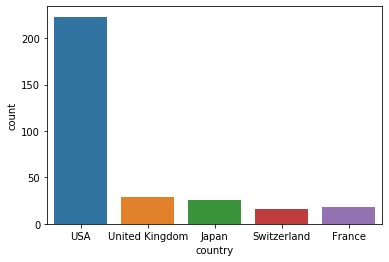

In [9]:
df_top5 = df.loc[(df.world_rank<101)&(df.country.isin(count_100.nlargest(5).index))]
sns.countplot(x='country', data=df_top5)

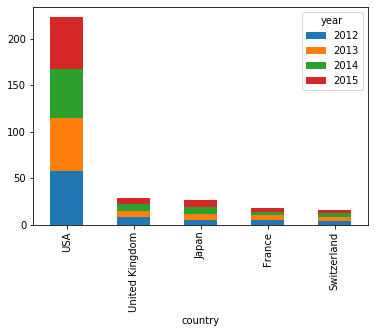

In [10]:
df_plot = df_top5.groupby(['year', 'country']).size().reset_index().pivot(columns='year', index='country', values=0)
df_plot.sort_values(by=2013,ascending=False,inplace=True)
df_plot.plot(kind='bar', stacked=True)


### 4. Groupby year and country showing the count of universities with world_rank within top 100 for that country and year. Set the name for column of counts as 'count_top100'. Sort the year in ascending order while count_top100 in descending order. See the table below as example output.

In [11]:
g = pd.DataFrame(df.loc[df['world_rank']<101].groupby(['year','country']).size()).rename(columns={0:'count_top100'})
g = g.reset_index(level=[0])
g

,year,count_top100
country,,
Australia,2012,2
Canada,2012,3
Denmark,2012,1
Finland,2012,1
France,2012,5
Germany,2012,3
Israel,2012,4
Italy,2012,1
Japan,2012,5


In [12]:
counttop100 = g.groupby('year').apply(lambda x : x.sort_values(by="count_top100",ascending=False))[['count_top100']]
counttop100

count_top100
year country                     
2012 USA                       58
     United Kingdom             8
     France                     5
     Japan                      5
     Israel                     4
     Switzerland                4
     Canada                     3
     Germany                    3
     Australia                  2
     Netherlands                2
     Denmark                    1
     Finland                    1
     Italy                      1
     Norway                     1
     South Korea                1
     Sweden                     1
2013 USA                       57
     United Kingdom             7
     Japan                      6
     France                     5
     Switzerland                4
     Canada                     4
     Israel                     4
     Australia                  2
     Germany                    2
     Italy                      1
     Norway                     1
     Russia                     1
     Singapore                  1
     South Korea                1
     Sweden                     1
     Finland                    1
     Denmark                    1
     Netherlands                1
2014 USA                       53
     Japan                      8
     United Kingdom             7
     France                     4
     Germany                    4
     Switzerland                4
     Israel                     3
     Canada                     3
     China                      2
     Sweden                     2
     Australia                  2
     Denmark                    1
     Italy                      1
     Belgium                    1
     Netherlands                1
     Russia                     1
     Singapore                  1
     South Korea                1
     Taiwan                     1
2015 USA                       55
     United Kingdom             7
     Japan                      7
     Switzerland                4
     France                     4
     Canada                     3
     Israel                     3
     South Korea                2
     Australia                  2
     Germany                    2
     China                      2
     Netherlands                2
     Belgium                    1
     Norway                     1
     Russia                     1
     Singapore                  1
     Sweden                     1
     Denmark                    1
     Taiwan                     1

In [13]:
pivot = pd.pivot_table(df.loc[df['world_rank']<101],
               index=['year','country'], 
               values=['world_rank'],
               aggfunc='count'
              )
pivot.rename(columns={'world_rank':'count_top100'},inplace=True)
pivot.sort_values(['year','count_top100'],ascending = [True,False])


count_top100
year country                     
2012 USA                       58
     United Kingdom             8
     France                     5
     Japan                      5
     Israel                     4
     Switzerland                4
     Canada                     3
     Germany                    3
     Australia                  2
     Netherlands                2
     Denmark                    1
     Finland                    1
     Italy                      1
     Norway                     1
     South Korea                1
     Sweden                     1
2013 USA                       57
     United Kingdom             7
     Japan                      6
     France                     5
     Canada                     4
     Israel                     4
     Switzerland                4
     Australia                  2
     Germany                    2
     Denmark                    1
     Finland                    1
     Italy                      1
     Netherlands                1
     Norway                     1
     Russia                     1
     Singapore                  1
     South Korea                1
     Sweden                     1
2014 USA                       53
     Japan                      8
     United Kingdom             7
     France                     4
     Germany                    4
     Switzerland                4
     Canada                     3
     Israel                     3
     Australia                  2
     China                      2
     Sweden                     2
     Belgium                    1
     Denmark                    1
     Italy                      1
     Netherlands                1
     Russia                     1
     Singapore                  1
     South Korea                1
     Taiwan                     1
2015 USA                       55
     Japan                      7
     United Kingdom             7
     France                     4
     Switzerland                4
     Canada                     3
     Israel                     3
     Australia                  2
     China                      2
     Germany                    2
     Netherlands                2
     South Korea                2
     Belgium                    1
     Denmark                    1
     Norway                     1
     Russia                     1
     Singapore                  1
     Sweden                     1
     Taiwan                     1

### 5. Use an appropriate visual chart to display the trend for the count of top 100 universities for Japan, China and Singapore for years 2012 - 2015 in a single chart.

In [14]:
countreset = counttop100.reset_index(level=[0,1])
JCS = countreset.loc[countreset.country.isin(['China','Singapore','Japan'])]
df2 = pd.DataFrame([[2012, 'China', 0], [2013,'China', 0], [2012,'Singapore',0]], columns=['year','country','count_top100'])
JCS=JCS.append(df2).sort_values(by=['year','count_top100'])
JCS

,year,country,count_top100
0,2012,China,0
2,2012,Singapore,0
3,2012,Japan,5
1,2013,China,0
28,2013,Singapore,1
18,2013,Japan,6
50,2014,Singapore,1
42,2014,China,2
35,2014,Japan,8
68,2015,Singapore,1


Text(0, 0.5, 'No. of universities in world top 100')

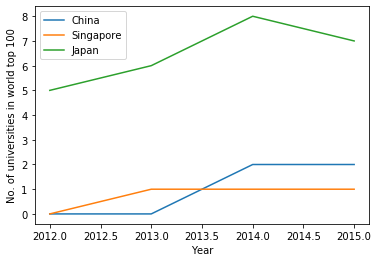

In [15]:
for i in range(3):
    data = JCS.loc[JCS.country == JCS.country.unique()[i]]
    plt.plot(data.year, data.count_top100, label = JCS.country.unique()[i])
plt.legend(loc = 'upper left')

plt.xlabel('Year')
plt.ylabel('No. of universities in world top 100')

In [18]:
trace0 = go.Scatter(
    
    x = JCS.loc[JCS.country=='Japan']['year'],
    y = JCS.loc[JCS.country=='Japan']['count_top100'],
    hovertext=[str(list(df.loc[(df.country=="Japan")&(df['world_rank']<101)&(df.year==2012)]['institution'])), 
               str(list(df.loc[(df.country=="Japan")&(df['world_rank']<101)&(df.year==2013)]['institution'])), 
               str(list(df.loc[(df.country=="Japan")&(df['world_rank']<101)&(df.year==2014)]['institution'])), 
               str(list(df.loc[(df.country=="Japan")&(df['world_rank']<101)&(df.year==2015)]['institution']))],
    hoverinfo="text",
    name = 'Japan',
    
    line = dict(color = ('red'), 
                width = 4)
)
trace1 = go.Scatter(
    
    x = JCS.loc[JCS.country=='China']['year'],
    y = JCS.loc[JCS.country=='China']['count_top100'],
    hovertext=["", "", 
               str(list(df.loc[(df.country=="China")&(df['world_rank']<101)&(df.year==2014)]['institution'])), 
               str(list(df.loc[(df.country=="China")&(df['world_rank']<101)&(df.year==2015)]['institution']))],
    hoverinfo="text",
    name = 'China',
    
    line = dict(color = ('green'),
                width = 4)
)
trace2 = go.Scatter(
    
    x = JCS.loc[JCS.country=='Singapore']['year'],
    y = JCS.loc[JCS.country=='Singapore']['count_top100'],
    hovertext=["", 
               str(list(df.loc[(df.country=="Singapore")&(df['world_rank']<101)&(df.year==2013)]['institution'])),
               str(list(df.loc[(df.country=="Singapore")&(df['world_rank']<101)&(df.year==2014)]['institution'])),
               str(list(df.loc[(df.country=="Singapore")&(df['world_rank']<101)&(df.year==2015)]['institution']))],
    hoverinfo="text",
    name = 'Singapore',
    
    line = dict(color = ('blue'),
                width = 4)
)
data = [trace0, trace1, trace2]

layout = dict(title = 'Trend for top 100 universities in Japan, China and Singapore',
              xaxis = dict(title = 'Year',tickmode = 'linear',tick0 = 2012, dtick = 1),
              yaxis = dict(title = 'Count'),
              )
fig = dict(data=data, layout=layout)

offline.iplot(fig)

### 6. For top 10 universities in 2015, what was the trend for world_rank for those universities across all the years? Which universities generally improved, and which ones declined in world_rank? Use an appropriate visual to show the trend and explain the results.

In [19]:
top10in2015 = df.loc[(df.world_rank<11) & (df.year==2015)].institution

In [20]:
df_filtered = df.loc[df.institution.isin(top10in2015)]
df_filtered

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,37.0,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,10.5,26,82.34,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,12.5,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,7.0,16,78.55,2012
10,11,University of Chicago,USA,9,15,26,8,34,20,28,20.0,101,73.82,2012
11,12,Cornell University,USA,10,21,42,14,22,21,16,22.5,10,73.69,2012


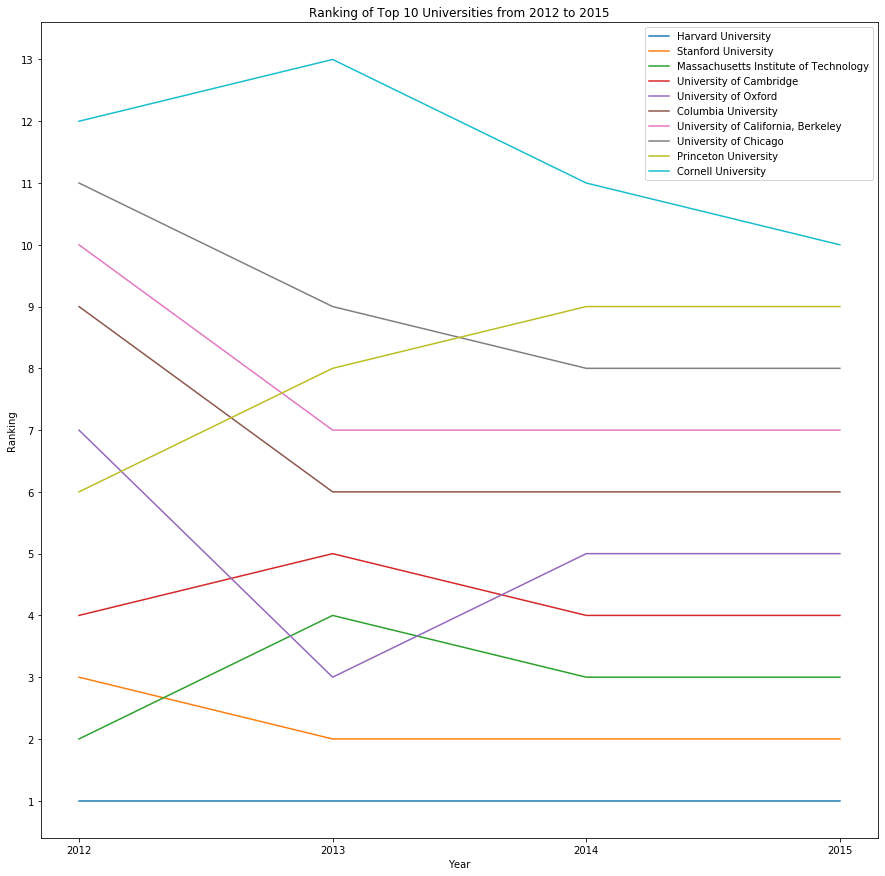

In [21]:

fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel('Year')
ax.set_ylabel('Ranking')
ax.set_title('Ranking of Top 10 Universities from 2012 to 2015');
plt.xticks(np.arange(2012, 2016, step=1))
plt.yticks(np.arange(0, 15, step=1))

for i in top10in2015:
    
    ax.plot(df_filtered[df_filtered.institution==i].year, df_filtered[df_filtered.institution==i].world_rank,label=i)
    
ax.legend(loc=1)

# C. OPEN ENDED QUESTION (Choose 1 among the following)
### Option 1: What are some of the factors (variables) that may be related to the world_rank and/or score? Is there any trends indicating shift in importance of factors influencing world_rank over the years or between countries? 

### Option 2: What are the relationships between the factors (variables) themselves? Is there any interesting patterns that can be detected? You may also choose to discuss yearly or country trends or a mixture of both. 

### For either of the above, you may choose to pick around 3-4 factors to deep-dive (how many factors to analyse is up to you). Additionally, if there's any other interesting insights about the data, you may also include in your analysis. 

In [22]:
#option 1
df_top100 = df.loc[df['world_rank']<101] # use top 100 uni from all 4 years for fairer comparison. 
len(df_top100)

400

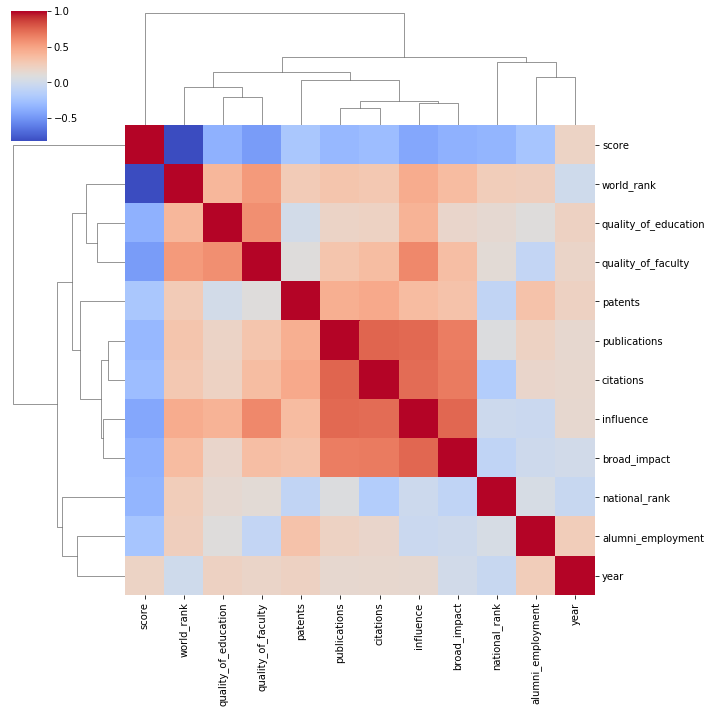

In [23]:
sns.clustermap(df_top100.corr(),cmap='coolwarm')

In [24]:

df_top100.corr()['world_rank'].sort_values() #alumni employment should be 25% so should have high corr, turns out not very correlated to world rank


score                  -0.815070
year                    0.000000
alumni_employment       0.246665
national_rank           0.260143
patents                 0.273335
citations               0.291380
publications            0.314943
broad_impact            0.370812
quality_of_education    0.400107
influence               0.460008
quality_of_faculty      0.543446
world_rank              1.000000
Name: world_rank, dtype: float64

In [25]:
for i in df_top100.year.unique():
    print(i)
    print(df_top100.loc[df_top100.year==i].corr()['world_rank'].sort_values())

#for 12/13, biggest factors are citations, influence and quality of faculty
#for 14/15, biggest factors are quality of education, influence and quality of faculty 

2012
score                  -0.862933
national_rank           0.243865
broad_impact            0.367493
alumni_employment       0.418279
quality_of_education    0.563944
patents                 0.576362
publications            0.627693
citations               0.675746
influence               0.705230
quality_of_faculty      0.769597
world_rank              1.000000
year                         NaN
Name: world_rank, dtype: float64
2013
score                  -0.837333
national_rank           0.314577
alumni_employment       0.525440
patents                 0.539342
broad_impact            0.543895
quality_of_education    0.549999
publications            0.669520
citations               0.670102
influence               0.689526
quality_of_faculty      0.752396
world_rank              1.000000
year                         NaN
Name: world_rank, dtype: float64
2014
score                  -0.834667
national_rank           0.184004
publications            0.234589
alumni_employment       0.24

In [26]:
df_4factors = df_top100[['quality_of_education','quality_of_faculty','influence','citations','world_rank','year','country']]

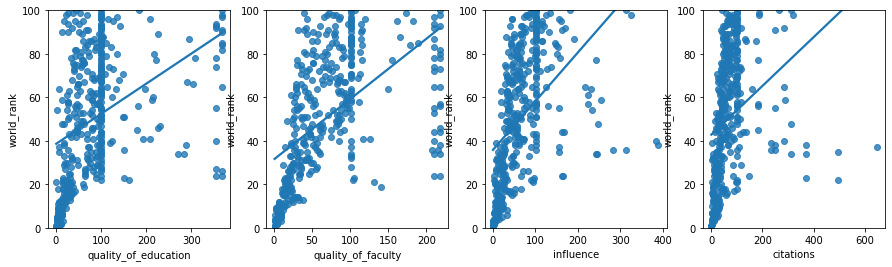

In [27]:
fig, axes = plt.subplots(1, 4,figsize=(15,4)) #c.f. anscombe quartet https://en.wikipedia.org/wiki/Anscombe%27s_quartet


for i in range(4): 
        axes[i].set_xlabel(df_4factors.columns[i])
        axes[i].set_ylim(0,100)
        sns.regplot (x=df_4factors.iloc[:,i],y=df_4factors.world_rank, ax = axes[i],ci=None)
        
        


# here, it is noted that many '101' values appear. This is due to having ranks > 100 and thus assumed as 101. 

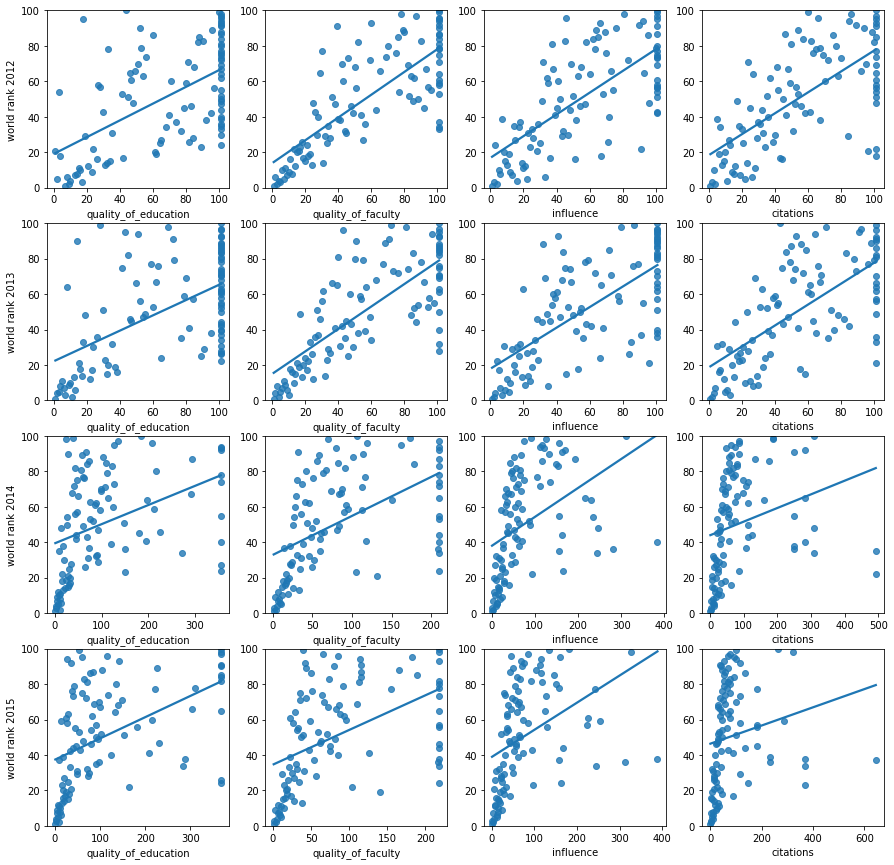

In [28]:
fig, axes = plt.subplots(4, 4,figsize=(15,15)) #c.f. anscombe quartet

for i in range(4): #year
    
    
    for j in range(4): #factor
        axes[i][j].set_xlabel(df_4factors.columns[j])
        axes[i][j].set_ylim(0,100)
        sns.regplot (x=df_4factors.loc[(df_4factors.year==2012+i)].iloc[:,j],
                     y=df_4factors.loc[(df_4factors.year==2012+i)].world_rank,
                     ax = axes[i][j],
                     ci=None)
        axes[i][j].set_ylabel('')
    axes[i][0].set_ylabel(f'world rank {2012+i}')  
    

# here, it is noted that many '101' values appear. This is due to having ranks > 100 and thus assumed as 101. 
# after 2013 this does not happen, so corr is artificially lower 

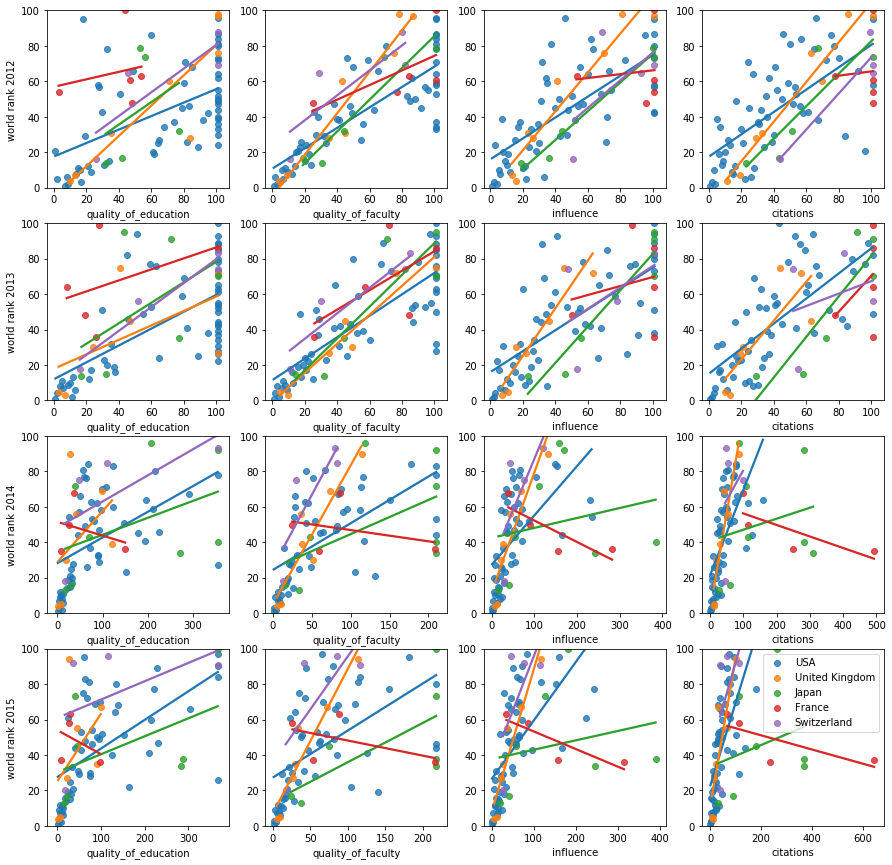

In [29]:
fig, axes = plt.subplots(4, 4,figsize=(15,15)) #c.f. anscombe quartet

for i in range(4): #year
    
    
    for j in range(4): #factor
        axes[i][j].set_xlabel(df_4factors.columns[j])
        axes[i][j].set_ylim(0,100)
        

        for k in range(5): #country
            sns.regplot (x=df_4factors.loc[(df_4factors.year==2012+i)& (df_4factors.country==(count_100.nlargest(5).index)[k])].iloc[:,j],
                         y=df_4factors.loc[(df_4factors.year==2012+i)& (df_4factors.country==(count_100.nlargest(5).index)[k])].world_rank, 
                         ax = axes[i][j],
                         ci=None,
                         label=(count_100.nlargest(5).index)[k])
        axes[i][j].set_ylabel('')
    axes[i][0].set_ylabel(f'world rank {2012+i}')  
    
plt.legend(loc=0)
# here, it is noted that many '101' values appear. This is due to having ranks > 100 and thus assumed as 101.
#france shows weird negative correlation in later years

In [30]:
df1415 = df.loc[df.year>2013] # analyse top 1000 uni in 2014/15


In [31]:
df1415.corr()['world_rank'].sort_values() # very strong corr in 4 factors

score                  -0.560002
year                    0.000000
national_rank           0.201458
quality_of_faculty      0.571581
alumni_employment       0.586003
quality_of_education    0.587646
patents                 0.631457
citations               0.824753
influence               0.873363
publications            0.906535
broad_impact            0.942998
world_rank              1.000000
Name: world_rank, dtype: float64

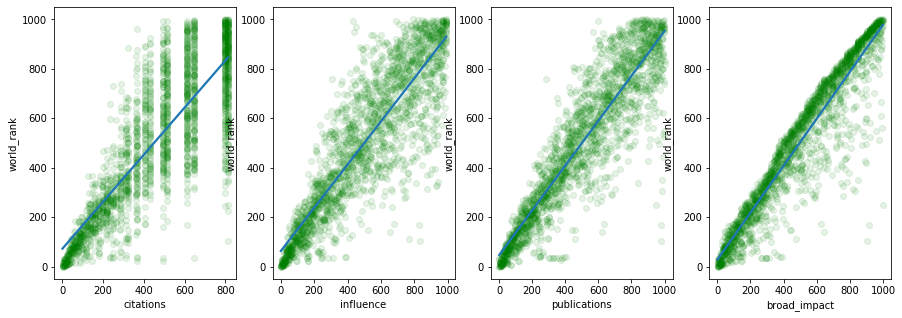

In [32]:
df1415_4factors = df1415[['citations','influence','publications','broad_impact','world_rank','year','country']]
fig, axes = plt.subplots(1, 4,figsize=(15,5)) 
for i in range(4): 
        axes[i].set_xlabel(df1415_4factors.columns[i])
        
        sns.regplot (x=df1415_4factors.iloc[:,i],
                     y=df1415_4factors.world_rank, 
                     ax = axes[i],
                     ci=None,
                     scatter_kws={"color":"g","alpha":0.1})
        

    

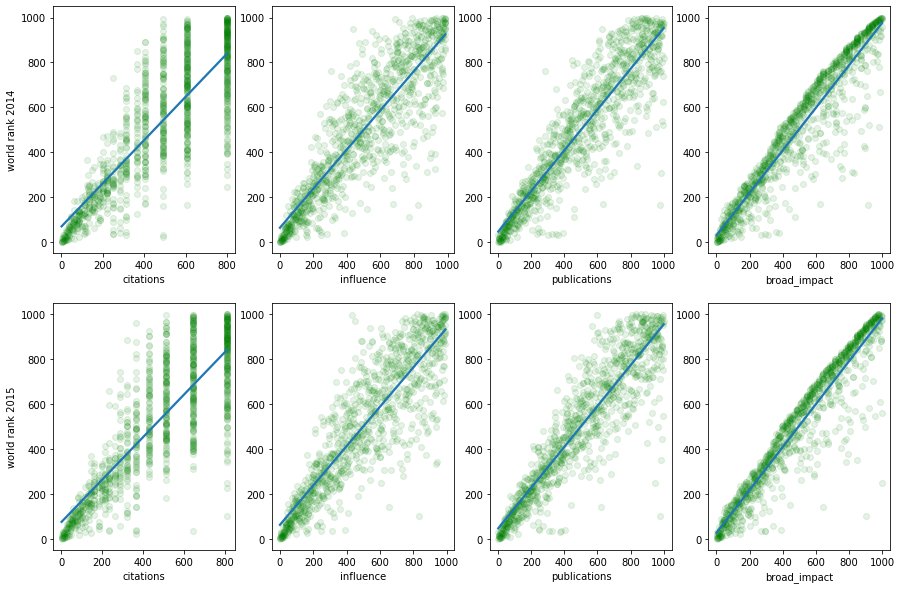

In [33]:
fig, axes = plt.subplots(2, 4,figsize=(15,10)) 

for i in range(2): #year
    
    
    for j in range(4): #factor
        axes[i][j].set_xlabel(df1415_4factors.columns[j])
        sns.regplot (x=df1415_4factors.loc[(df1415_4factors.year==2014+i)].iloc[:,j],
                     y=df1415_4factors.loc[(df1415_4factors.year==2014+i)].world_rank, 
                     ax = axes[i][j],
                     ci=None,
                     scatter_kws={"color":"g","alpha":0.1})
        axes[i][j].set_ylabel('')
    axes[i][0].set_ylabel(f'world rank {2014+i}')  
    
# note many 600 and 800 values for citations. Likely to be artificial.

In [34]:
df1415.groupby('country').count()['world_rank'].sort_values(ascending=False)


country
USA                     458
China                   167
Japan                   148
United Kingdom          129
Germany                 110
France                   99
Italy                    94
Spain                    81
South Korea              70
Canada                   65
Australia                54
Taiwan                   46
Brazil                   36
India                    31
Netherlands              26
Austria                  24
Sweden                   22
Turkey                   20
Belgium                  20
Finland                  18
Poland                   18
Switzerland              18
Iran                     16
Ireland                  16
Israel                   14
Portugal                 14
Greece                   14
New Zealand              12
Hong Kong                12
Hungary                  12
Norway                   10
Denmark                  10
South Africa             10
Czech Republic           10
Russia                    8
Saudi Arabia

In [35]:
df1415_4factors_top10 = df1415_4factors.loc[df1415_4factors.country.isin(df1415.groupby('country').count()['world_rank'].sort_values(ascending=False).nlargest(10).index)]
len(df1415_4factors_top10) #focus on top 10 since too many countries

1421

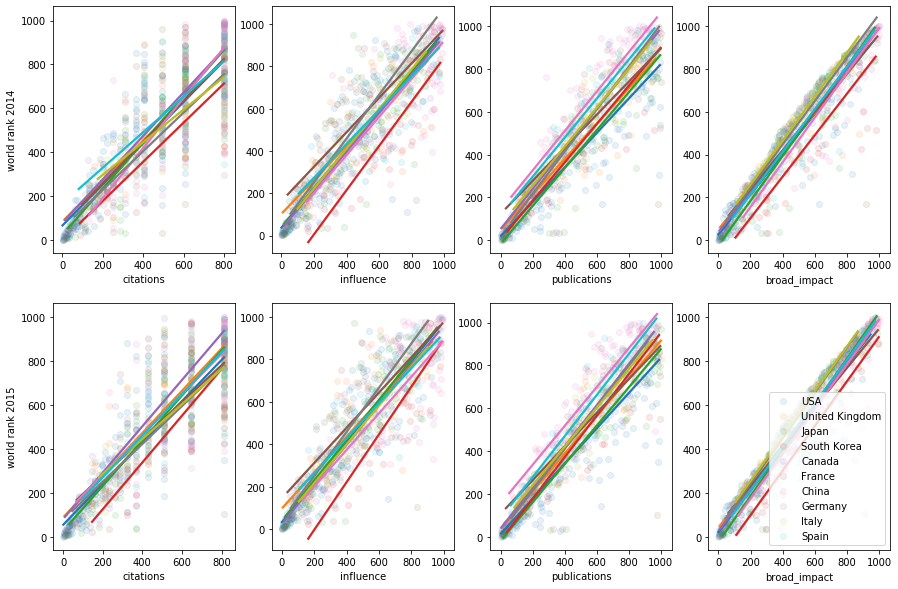

In [36]:
fig, axes = plt.subplots(2, 4,figsize=(15,10)) #c.f. anscombe quartet

for i in range(2): #year
       
    for j in range(4): #factor
        axes[i][j].set_xlabel(df1415_4factors_top10.columns[j])
        
        for k in range(10): #country
            sns.regplot (x=df1415_4factors_top10.loc[(df1415_4factors_top10.year==2014+i)& (df1415_4factors_top10.country==df1415_4factors_top10.country.unique()[k])].iloc[:,j],
                         y=df1415_4factors_top10.loc[(df1415_4factors_top10.year==2014+i)& (df1415_4factors_top10.country==df1415_4factors_top10.country.unique()[k])].world_rank,
                         ax = axes[i][j],
                         ci=None,
                         label=df1415_4factors_top10.country.unique()[k],
                         scatter_kws={"alpha":0.1})
        axes[i][j].set_ylabel('')
    axes[i][0].set_ylabel(f'world rank {2014+i}')  
    
plt.legend(loc=0)
# all countries have similar trends.

In [ ]:
# in summary, when comparing top 100 uni from 2012 to 2015, 4 factors that are correlated (>0.400) are quality of education, quality of faculty, citations and influence. 
# shift in corr in later years, quality of education > citations
# France shows interesting neg correlation in later years. 
# top 1000 uni ranking in 14/15 shows better corr across countries.